In [70]:
import json 
import os
import pandas as pd
from tqdm import tqdm
import mapbox_vector_tile
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-j-6B")

In [48]:
FILE_DIR = '../../map_generation/EDA'
ALL_VECTOR_DIR = '../../data/vector_tiles'
files = ['file1.json', 'file2.json', 'file3.json']

def mvt2json(path):
    with open(path, mode="rb") as mvt_file:
        contents = mvt_file.read()
        return  mapbox_vector_tile.decode(contents)

def read_json(path):
    file = open(os.path.join(FILE_DIR, path), "r")
    dic_json = json.load(file)
    return json.dumps(dic_json)

def read_single_string(path):
    file = open(os.path.join(FILE_DIR, path), "r")
    return file.read()

# # works for geojson from mvt
# def layer_tokens(path):
#     file = open(os.path.join(FILE_DIR, path), "r")
#     dic_json = json.load(file)
#     layers = {}
#     for feature in dic_json['features']:
#         if feature['properties']['vt_layer'] not in layers.keys():
#             layers[feature['properties']['vt_layer']] = []
#     return layers

In [56]:
berlin = pd.read_pickle('../../data/vector_tiles/Berlin, Germany.pkl')
path = os.path.join("../..", berlin.iloc[0]['tile'])
tile = mvt2json(path)
tile.keys()

dict_keys(['admin', 'landuse', 'natural_label', 'road', 'structure', 'waterway'])

In [66]:
layers = {}
for idx, tile in tqdm(berlin.iterrows(), total=berlin.shape[0]):
    path = os.path.join("../..", tile['tile'])
    tile = mvt2json(path)
    for layer in tile.keys():
        if layer not in layers.keys():
            layers[layer] = []
        layer_str = json.dumps(tile[layer])
        tokens = tokenizer.tokenize(layer_str)
        layers[layer].append(len(tokens))

100%|██████████| 6786/6786 [13:52<00:00,  8.15it/s]


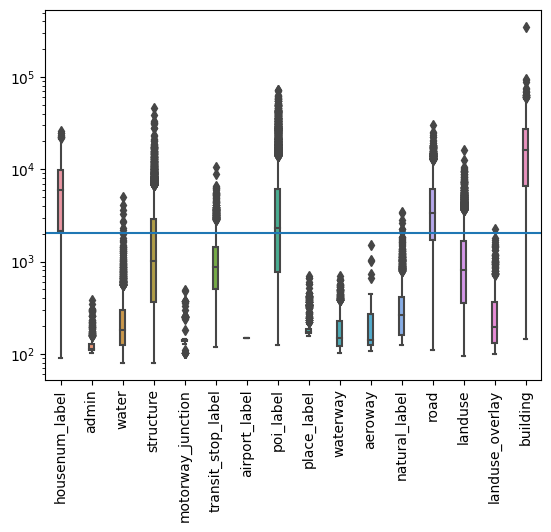

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import operator as op

sorted_keys, sorted_vals = zip(*sorted(layers.items(), key=op.itemgetter(1)))

# almost verbatim from question
boxplot = sns.boxplot(data=sorted_vals, width=.18)

# category labels
plt.xticks(plt.xticks()[0], sorted_keys)

for item in boxplot.get_xticklabels():
    item.set_rotation(90)
boxplot.set_yscale("log")
boxplot.axhline(2048)
plt.show()